In [2]:
from chxanalys.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
from chxanalys.chx_libs import markers, colors, cmap_vge, cmap_albula


import pandas as pds
#%reset -f  #for clean up things in the memory

# Define Result Path here

In [3]:
data_dir = '/XF11ID/analysis/2017_1/yuzhang/Results/Protein_sample_MIT/'
data_dir_tif = '/XF11ID/analysis/2017_1/yuzhang/Results/Protein_sample_MIT/epxort_tif/'

# Build a uid dictionary here

In [4]:
uid = 'uid=Protein_sample_MIT'

In [5]:
extract_dict = extract_xpcs_results_from_h5( filename = uid + '_Res.h5', import_dir = data_dir )

In [6]:
extract_dict.keys()

dict_keys(['mean_int_sets', 'taus_uids', 'qt', 'pixel_mask', 'mask', 'tausb', 'g2b_fit_paras', 'g2', 'q_saxs', 'g12b', 'roi_mask', 'qval_dict_p', 'qval_dict', 'wat', 'qval_dict_v', 'times_roi', 'iqst', 'taus', 'g2_uids', 'iq_saxs', 'avg_img', 'imgsum', 'g2_fit_paras', 'g2b', 'md'])

In [9]:
g2 = extract_dict['g2']
taus = extract_dict['taus']
qval_dict = extract_dict['qval_dict']

In [10]:
fit_g2_func = 'stretched'
scat_geometry = 'saxs'



In [11]:
g2_fit_result, taus_fit, g2_fit = get_g2_fit_general( g2,  taus, 
    function = fit_g2_func,  vlim=[0.95, 1.05], fit_range= None,  
    fit_variables={'baseline': True, 'beta':True, 'alpha': True,'relaxation_rate':True},
    guess_values={'baseline':1.0,'beta':0.08,'alpha':1.0,'relaxation_rate':0.01,},
    guess_limits = dict( baseline =[0.5, 2.5], alpha=[0, 2],
                        beta = [0, 1], relaxation_rate= [0.001, 100]) 
                                                    )

g2_fit_paras = save_g2_fit_para_tocsv(g2_fit_result,  filename= uid  +'_g2_fit_paras.csv', path=data_dir )

The g2 fitting parameters are saved in /XF11ID/analysis/2017_1/yuzhang/Results/Protein_sample_MIT/uid=Protein_sample_MIT_g2_fit_paras.csv


In [12]:
g2_fit_paras

,alpha,beta,baseline,relaxation_rate
0,1.481649,0.064600,1.028219,16.282791
1,1.581739,0.083908,1.046521,21.453011
2,1.629693,0.082969,1.011762,25.041075
3,1.635652,0.084056,1.080022,28.513157
4,1.492863,0.078287,1.084730,31.983232
5,1.471263,0.067485,1.034266,34.779922
6,0.998984,0.073102,1.015210,41.908734
7,1.965179,0.051071,1.012122,60.392563
8,1.999999,0.037476,1.016420,56.153064
9,0.859907,0.040601,1.017085,47.211016


In [210]:
#g2_fit_paras

In [13]:
from chxanalys.chx_libs import markers, colors

<IPython.core.display.Javascript object>


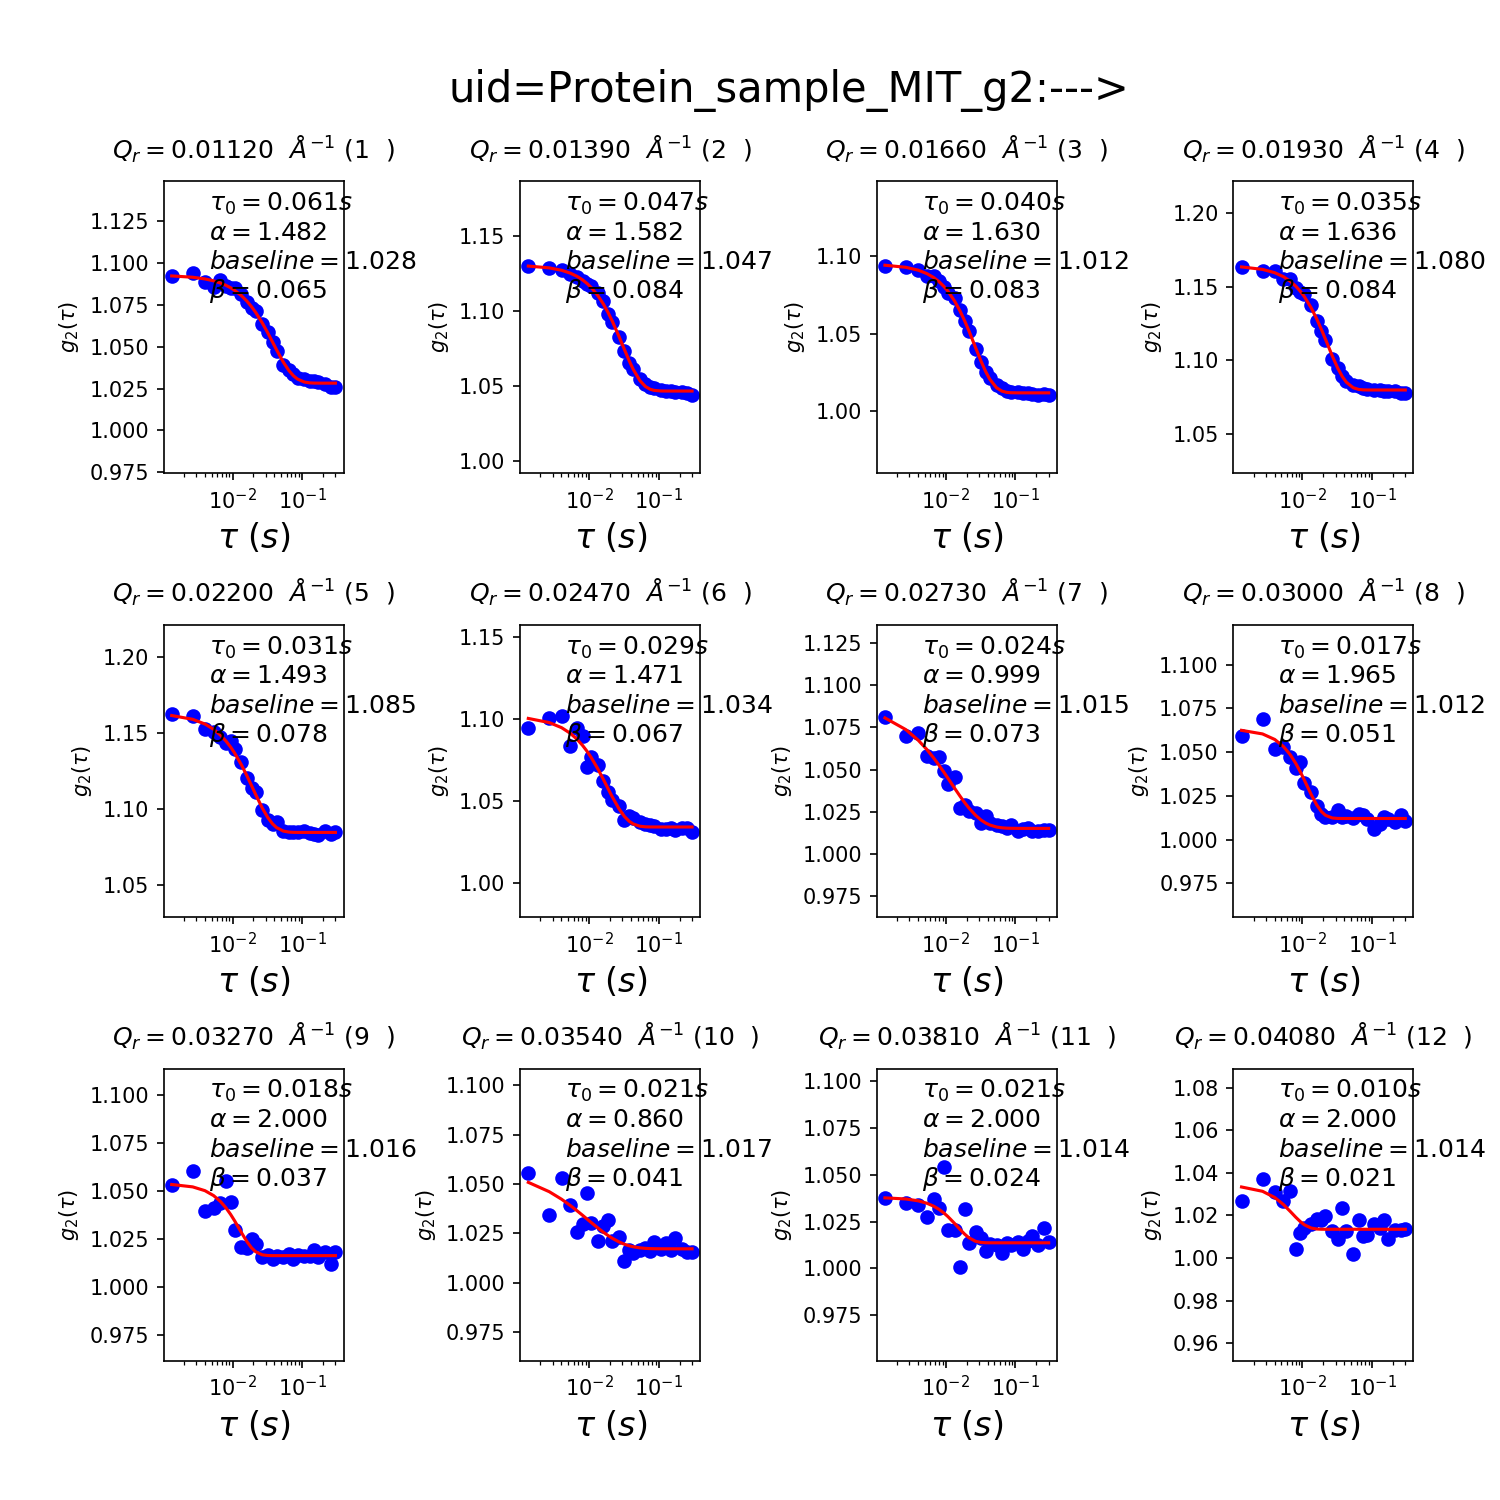

In [14]:
plot_g2_general( g2_dict={1:g2, 2:g2_fit}, taus_dict={1:taus, 2:taus_fit},vlim=[0.95, 1.05],
    qval_dict = qval_dict, fit_res= g2_fit_result,  geometry= scat_geometry,filename= uid +'_g2', 
        path= data_dir, function= fit_g2_func,  ylabel='g2', append_name=  '_fit')



In [15]:
list( range( g2.shape[1] - 6   ))

[0, 1, 2, 3, 4, 5]

<IPython.core.display.Javascript object>


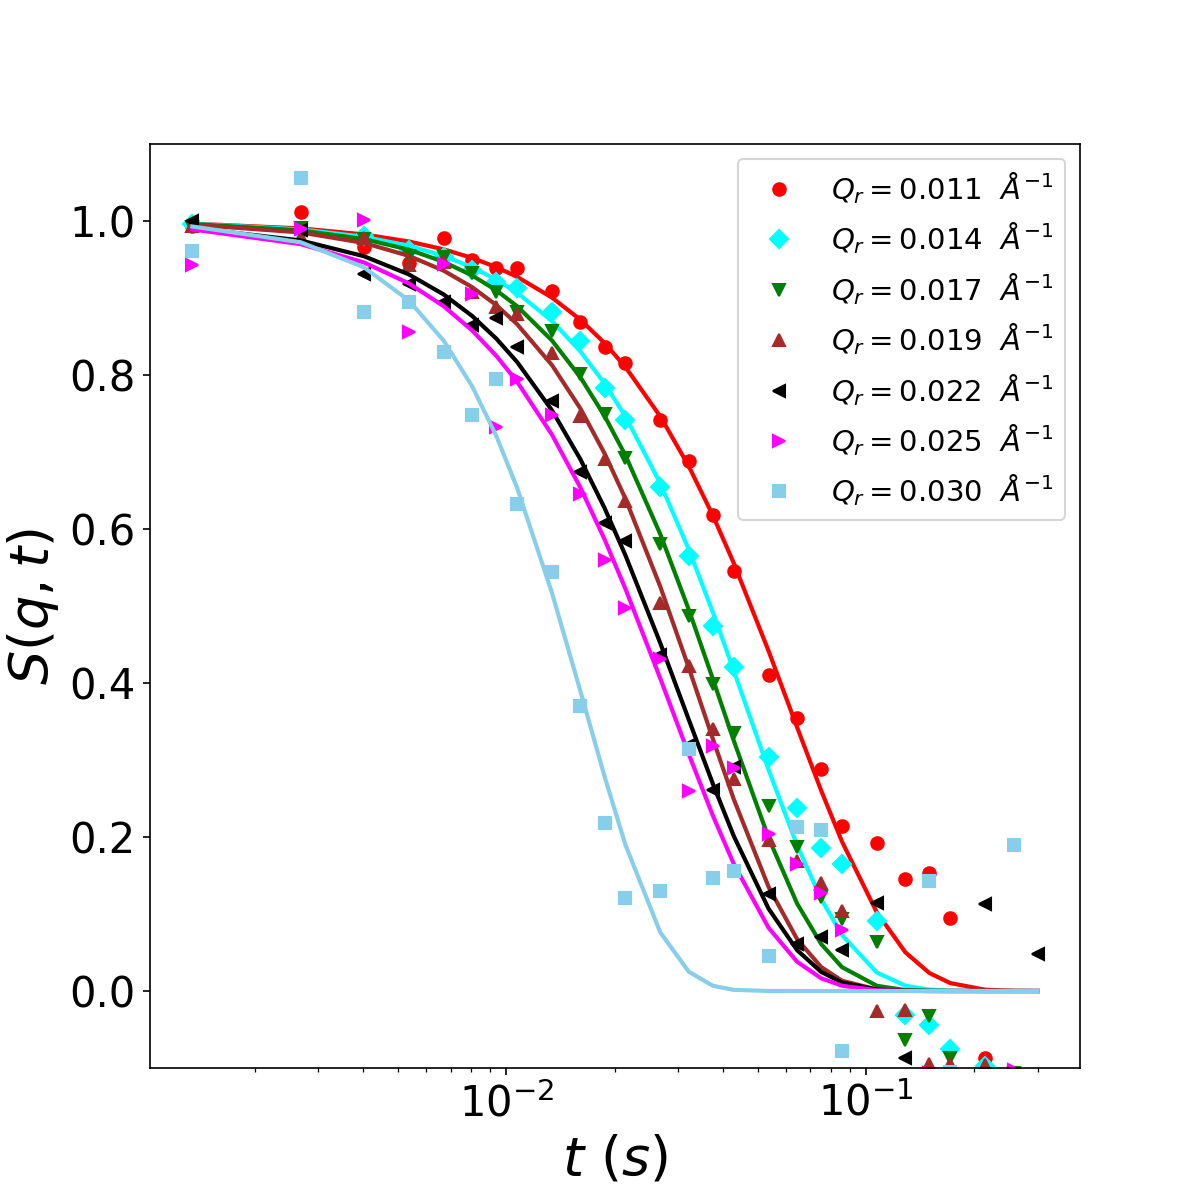

7


In [16]:
i=0
fig,ax=plt.subplots( figsize=(8, 8) )
for qth in list( range( g2.shape[1] - 6   )) + [ 7 ] :
#for qth in list( range( g2.shape[1] - 0   ))  :    
    i +=1
    x = taus[1:]
    delta =  g2[1:,qth] - g2_fit_paras['baseline'][qth] 
    g2i = np.sqrt(   np.abs( delta )  / g2_fit_paras['beta'][qth]    ) * np.sign( delta  )
    g1_fit = np.exp( -   (g2_fit_paras['relaxation_rate'][qth] * x )** g2_fit_paras['alpha'][qth]  )
    
    plot1D( x =  x, y= g1_fit, marker = '', color= colors[i], ls = '-', lw= 2 ,
            ax=ax,      logx=True,  legend= None,     ) 
        
    plot1D( x =  x, y= g2i, marker = markers[qth], color= colors[i], ls = '',
            ax=ax,      logx=True, 
           legend= r'$Q_r= $'+'%.3f  '%( qval_dict[qth][0]  ) + r'$\AA^{-1}$', legend_size = 14, 
           ylim=[-0.1, 1.1], 
           xlabel=r"$t $ $(s)$",  
           ylabel =   r"$S(q,t)$"   )   
    
    
ax.set_title('')    
ax.yaxis.label.set_size(26)
ax.xaxis.label.set_size(26)
plt.tick_params(axis='both',  labelsize=20)
print(i)
#ax.set_title ('normalized' +'one_time_correlation-->q=%s')
plt.savefig( data_dir_tif + 'G1_plot.tif', dpi= 300) 
#fig.tight_layout()


In [17]:
data_dir

'/XF11ID/analysis/2017_1/yuzhang/Results/Protein_sample_MIT/'

In [18]:
#qvc = qval_dict.copy
qval_dict_ = {}
g2_fit_paras_ = []
for k in list( range( g2.shape[1] - 6   )) + [ 7 ]:
    qval_dict_[k] = qval_dict[k]
    g2_fit_paras_.append( g2_fit_paras['relaxation_rate'][k]  )

The fitted diffusion coefficient D0 is:  6.814e+04   A^2S-1


<IPython.core.display.Javascript object>


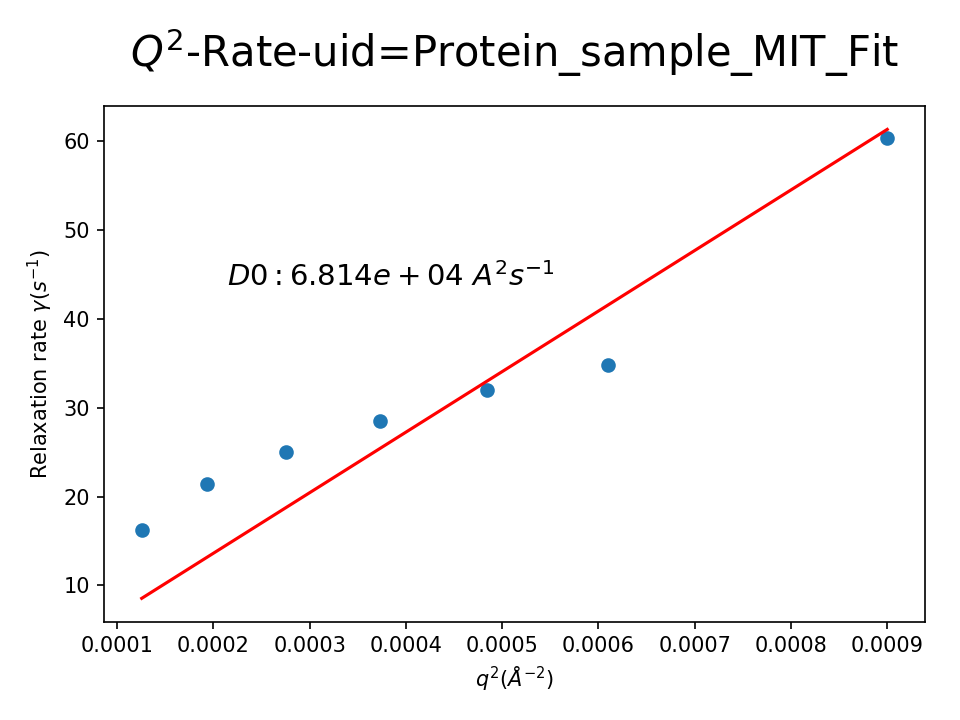

In [19]:
D0, qrate_fit_res = get_q_rate_fit_general(  qval_dict_, 
                                           g2_fit_paras_,
                                           geometry= scat_geometry )
plot_q_rate_fit_general( qval_dict_, g2_fit_paras_,  qrate_fit_res, 
                geometry= scat_geometry,uid=uid, path= data_dir )

# Check images

In [20]:
uid = '77f73345'

In [21]:
md = get_meta_data( uid )
imgs = load_data( uid, md['detector'], reverse= True  )

In [22]:
mask_path = '/XF11ID/analysis/2016_3/masks/'
mask_name = 'Nov3_4M_mask.npy'
mask = load_mask(mask_path, mask_name, plot_ =  False, image_name = '_mask', reverse=True )
mask[:,2069] =0 # False  #Concluded from the previous results
mask_load=mask.copy()
imgsa = apply_mask( imgs, mask )

In [23]:
filename = '/XF11ID/analysis/Compressed_Data' +'/uid_%s.cmp'%md['uid'] 
mask, avg_img, imgsum, bad_frame_list = compress_eigerdata(imgs, mask, md, filename, 
         force_compress= False,  para_compress= True,  bad_pixel_threshold= 1e14,
                        bins=1, num_sub= 100, num_max_para_process= 500, with_pickle=True  )

Using already created compressed file with filename as :/XF11ID/analysis/Compressed_Data/uid_77f73345-cf10-4808-a548-0ae311ca3b6c.cmp.


In [24]:
#show_img( imgsa[100],  vmin= 0.00001, vmax= .1, logs=True,  cmap = cmap_albula, 
#         image_name= '',  save=True, path=data_dir,  show_ticks = False,   aspect=1.0,      ) 

In [25]:
#%run /XF11ID/analysis/Analysis_Pipelines/Develop/chxanalys/chxanalys/chx_generic_functions.py

<IPython.core.display.Javascript object>


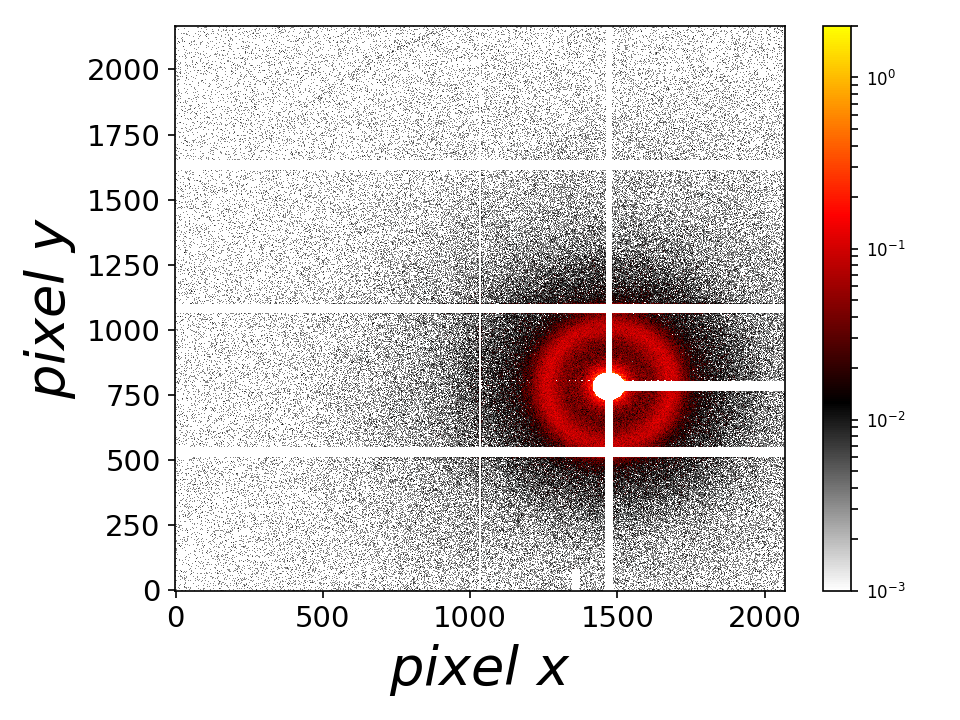

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/colorbar.py:821: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  y[self._inside] = norm(yi)


In [33]:
unit = 1 #1.333*10**(-3)

ax = plt.subplots(   )
show_img( avg_img/unit,  vmin= 0.001/unit, vmax= 2/unit, logs=True,  cmap = cmap_albula,
         image_name= '',  save=False, path=data_dir,  show_ticks = True,  ax=ax,  
         xlabel=r'$pixel$ $x$',ylabel=r'$pixel$ $y$', save_format='tif', dpi=300, file_name ='img_avg_plot0',
        ) 

fig, ax1 = ax

ax1.yaxis.label.set_size(26)
ax1.xaxis.label.set_size(26)
plt.tick_params(axis='both',  labelsize= 14)

plt.savefig( data_dir_tif + 'img_avg_plot0.tif', dpi= 300) 
#fig.tight_layout()

In [27]:
#ax=plt.subplots( figsize=(8, 6) )

#show_img( avg_img,  vmin= 0.001, vmax= 2, logs=True,  cmap = cmap_albula, aspect=1.0,
#         image_name= '',  save=True, path=data_dir,  show_ticks = False, ax = ax,        ) 

In [28]:
data_dir

'/XF11ID/analysis/2017_1/yuzhang/Results/Protein_sample_MIT/'

<IPython.core.display.Javascript object>


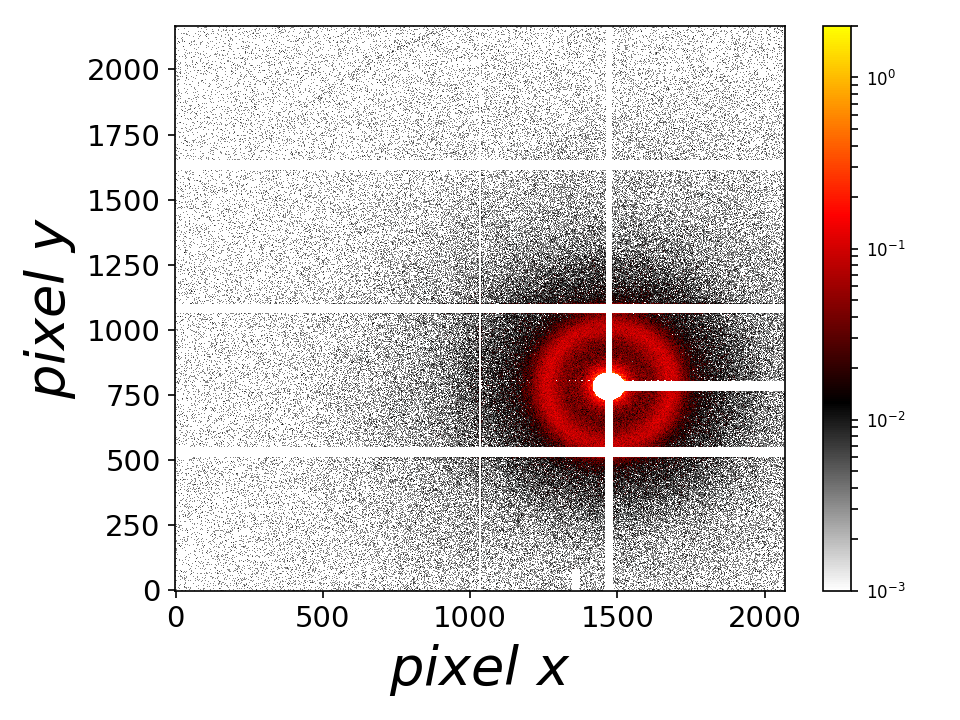

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/colorbar.py:821: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  y[self._inside] = norm(yi)


In [31]:

ax = plt.subplots(   )
show_img( avg_img/unit,  vmin= 0.001/unit, vmax= 2/unit, logs=True,  cmap = cmap_albula,
         image_name= '',  save=False, path=data_dir_tif,  show_ticks = True,  ax=ax,  
         xlabel=r'$pixel$ $x$',ylabel=r'$pixel$ $y$', save_format='tif', dpi=300, file_name ='img_avg_plot1',
        ) 
fig, ax1 = ax

ax1.yaxis.label.set_size(26)
ax1.xaxis.label.set_size(26)
plt.tick_params(axis='both',  labelsize= 14)

plt.savefig( data_dir_tif + 'img_avg_plot1.tif', dpi= 300) 
#fig.tight_layout()

# Plot q~Iq

In [34]:
data_dir

'/XF11ID/analysis/2017_1/yuzhang/Results/Protein_sample_MIT/'

In [35]:
q_saxs = extract_dict['q_saxs']
iq_saxs = extract_dict['iq_saxs']

<IPython.core.display.Javascript object>


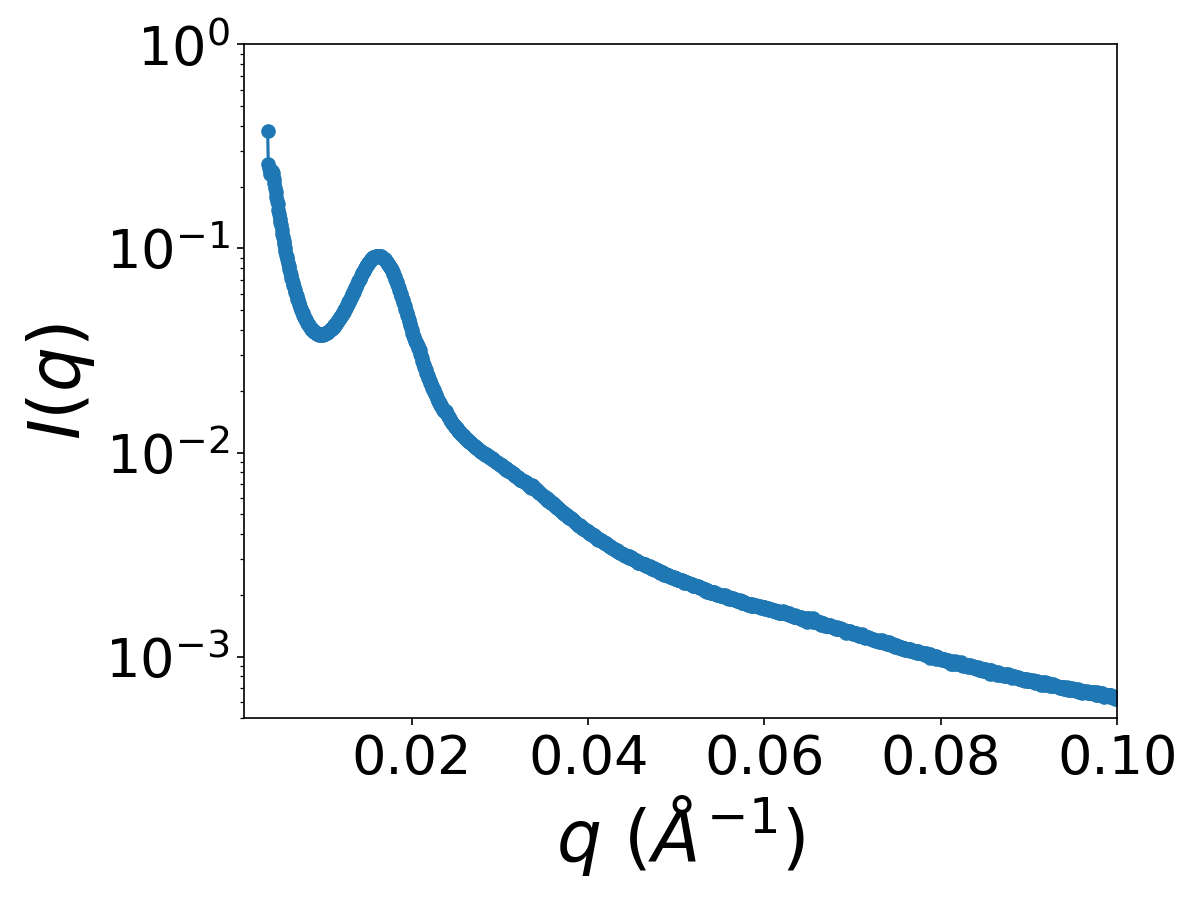

In [36]:
fig, ax=plt.subplots( figsize=(8,6) )
ax.semilogy(q_saxs,  iq_saxs , '-o') 
ax.set_xlabel(r'$q $ ('r'$\AA^{-1}$)', fontsize= 34  )        
ax.set_ylabel(r'$I(q)$', fontsize= 34 ) 

plt.xticks(  fontsize = 26 )
plt.yticks(  fontsize = 26 )
ax.set_xlim( 0.001, 0.1)
ax.set_ylim( 0.0005, 1)
fig.tight_layout()
#title = ax1.set_title('%s_Circular Average'%uid)  



plt.savefig( data_dir_tif + 'Iq_plot.tif', dpi= 300) 